In [1]:
import configparser
import pandas as pd
import numpy as np
import nltk 
import string
string.punctuation

import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords 
from tqdm.auto import tqdm
from nltk.tokenize import word_tokenize 

In [2]:
df = pd.read_csv("reviews.csv")
df

,Time_submitted,Review,Rating,Total_thumbsup,Reply
0,2022-07-09 15:00:00,"Great music service, the audio is high quality...",5,2,NaN
1,2022-07-09 14:21:22,Please ignore previous negative rating. This a...,5,1,NaN
2,2022-07-09 13:27:32,"This pop-up ""Get the best Spotify experience o...",4,0,NaN
3,2022-07-09 13:26:45,Really buggy and terrible to use as of recently,1,1,NaN
4,2022-07-09 13:20:49,Dear Spotify why do I get songs that I didn't ...,1,1,NaN
...,...,...,...,...,...
61589,2022-01-01 03:01:29,Even though it was communicated that lyrics fe...,1,6,NaN
61590,2022-01-01 02:13:40,"Use to be sooo good back when I had it, and wh...",1,0,NaN
61591,2022-01-01 01:02:29,This app would be good if not for it taking ov...,2,10,NaN
61592,2022-01-01 00:49:23,The app is good hard to navigate and won't jus...,2,1,NaN


In [3]:
df_1 = df[['Review','Rating']]
df_1

,Review,Rating
0,"Great music service, the audio is high quality...",5
1,Please ignore previous negative rating. This a...,5
2,"This pop-up ""Get the best Spotify experience o...",4
3,Really buggy and terrible to use as of recently,1
4,Dear Spotify why do I get songs that I didn't ...,1
...,...,...
61589,Even though it was communicated that lyrics fe...,1
61590,"Use to be sooo good back when I had it, and wh...",1
61591,This app would be good if not for it taking ov...,2
61592,The app is good hard to navigate and won't jus...,2


# remove symbols

In [4]:
#remove symbols and punctuation
def remove_punctuation(txt):
    txt_nopunct = "" .join([c for c in txt if c not in string.punctuation])
    txt_nopunct = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ", txt_nopunct)
    return txt_nopunct
df_1['review'] = df_1['Review'].apply(lambda x: remove_punctuation(x))


C:\temp\ipykernel_1532\111560.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['review'] = df_1['Review'].apply(lambda x: remove_punctuation(x))


# Tokenization

In [5]:
#tokenization
def tokenize(txt):
    tokens = re.split(' ', txt)
    return tokens
df_1['review_token'] = df_1['review'].apply(lambda x: tokenize(x.lower()))

C:\temp\ipykernel_1532\491490844.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['review_token'] = df_1['review'].apply(lambda x: tokenize(x.lower()))


# remove stopwords

In [6]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
stopwords = nltk.corpus.stopwords.words('english')
stopwords[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [8]:
def remove_stopwords(txt):
    txt_clean = [word for word in txt if word not in stopwords]
    return txt_clean
df_1['review_stopwords'] = df_1['review_token'].apply(lambda x: remove_stopwords(x))

In [9]:
import nltk
from nltk.stem import PorterStemmer
ps = PorterStemmer()
dir(ps)

['MARTIN_EXTENSIONS',
 'NLTK_EXTENSIONS',
 'ORIGINAL_ALGORITHM',
 '__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_apply_rule_list',
 '_contains_vowel',
 '_ends_cvc',
 '_ends_double_consonant',
 '_has_positive_measure',
 '_is_consonant',
 '_measure',
 '_replace_suffix',
 '_step1a',
 '_step1b',
 '_step1c',
 '_step2',
 '_step3',
 '_step4',
 '_step5a',
 '_step5b',
 'mode',
 'pool',
 'stem',
 'vowels']

In [10]:
print(ps.stem('coder'))
print(ps.stem('coding'))
print(ps.stem('code'))

coder
code
code


In [11]:
print(ps.stem('Allow'))
print(ps.stem('Allowed'))
print(ps.stem('Allow'))

allow
allow
allow


In [12]:
print(ps.stem('eat'))
print(ps.stem('ate'))
print(ps.stem('eaten'))

eat
ate
eaten


In [13]:
print(ps.stem('go'))
print(ps.stem('went'))
print(ps.stem('gone'))

go
went
gone


# Stemming

In [14]:
def stemming(tokenized_text):
    txt = [ps.stem(word) for word in tokenized_text]
    return txt
df_1['review_stemming'] = df_1['review_stopwords'].apply(lambda x: stemming(x))

# Labeling

In [15]:
#labeling dataset
df_1.loc[df_1['Rating']  <= 2, 'sentiment'] = "Negative"
df_1.loc[df_1['Rating']  >= 4, 'sentiment'] = "Positive"
df_1.loc[df_1['Rating']  == 3, 'sentiment'] = "Neutral"
df_1[:10]

,Review,Rating,review,review_token,review_stopwords,review_stemming,sentiment
0,"Great music service, the audio is high quality...",5,Great music service the audio is high quality ...,"[great, music, service, the, audio, is, high, ...","[great, music, service, audio, high, quality, ...","[great, music, servic, audio, high, qualiti, a...",Positive
1,Please ignore previous negative rating. This a...,5,Please ignore previous negative rating This ap...,"[please, ignore, previous, negative, rating, t...","[please, ignore, previous, negative, rating, a...","[pleas, ignor, previou, neg, rate, app, super,...",Positive
2,"This pop-up ""Get the best Spotify experience o...",4,This popup Get the best Spotify experience on ...,"[this, popup, get, the, best, spotify, experie...","[popup, get, best, spotify, experience, androi...","[popup, get, best, spotifi, experi, android, 1...",Positive
3,Really buggy and terrible to use as of recently,1,Really buggy and terrible to use as of recently,"[really, buggy, and, terrible, to, use, as, of...","[really, buggy, terrible, use, recently]","[realli, buggi, terribl, use, recent]",Negative
4,Dear Spotify why do I get songs that I didn't ...,1,Dear Spotify why do I get songs that I didnt p...,"[dear, spotify, why, do, i, get, songs, that, ...","[dear, spotify, get, songs, didnt, put, playli...","[dear, spotifi, get, song, didnt, put, playlis...",Negative
5,The player controls sometimes disappear for no...,3,The player controls sometimes disappear for no...,"[the, player, controls, sometimes, disappear, ...","[player, controls, sometimes, disappear, reaso...","[player, control, sometim, disappear, reason, ...",Neutral
6,I love the selection and the lyrics are provid...,5,I love the selection and the lyrics are provid...,"[i, love, the, selection, and, the, lyrics, ar...","[love, selection, lyrics, provided, song, your...","[love, select, lyric, provid, song, your, listen]",Positive
7,Still extremely slow when changing storage to ...,3,Still extremely slow when changing storage to ...,"[still, extremely, slow, when, changing, stora...","[still, extremely, slow, changing, storage, ex...","[still, extrem, slow, chang, storag, extern, s...",Neutral
8,It's a great app and the best mp3 music app I ...,5,Its a great app and the best mp3 music app I h...,"[its, a, great, app, and, the, best, mp3, musi...","[great, app, best, mp3, music, app, ever, used...","[great, app, best, mp3, music, app, ever, use,...",Positive
9,"I'm deleting this app, for the following reaso...",1,Im deleting this app for the following reasons...,"[im, deleting, this, app, for, the, following,...","[im, deleting, app, following, reasons, app, f...","[im, delet, app, follow, reason, app, fail, bu...",Negative


In [16]:
#remove sentiment netral
df_1 = df_1.drop(df_1[df_1.Rating == 3].index)


<AxesSubplot:ylabel='sentiment'>

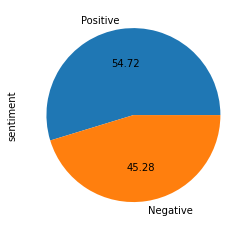

In [17]:
import matplotlib.pyplot as plt
df_1['sentiment'].value_counts().plot.pie(autopct='%.2f')

In [19]:
df_1["sentiment"].value_counts()
cleanup_nums = {"sentiment":     {"Negative":2, "Positive": 1,}}
df_1 = df_1.replace(cleanup_nums)
df_1.head(100)

,Review,Rating,review,review_token,review_stopwords,review_stemming,sentiment
0,"Great music service, the audio is high quality...",5,Great music service the audio is high quality ...,"[great, music, service, the, audio, is, high, ...","[great, music, service, audio, high, quality, ...","[great, music, servic, audio, high, qualiti, a...",1
1,Please ignore previous negative rating. This a...,5,Please ignore previous negative rating This ap...,"[please, ignore, previous, negative, rating, t...","[please, ignore, previous, negative, rating, a...","[pleas, ignor, previou, neg, rate, app, super,...",1
2,"This pop-up ""Get the best Spotify experience o...",4,This popup Get the best Spotify experience on ...,"[this, popup, get, the, best, spotify, experie...","[popup, get, best, spotify, experience, androi...","[popup, get, best, spotifi, experi, android, 1...",1
3,Really buggy and terrible to use as of recently,1,Really buggy and terrible to use as of recently,"[really, buggy, and, terrible, to, use, as, of...","[really, buggy, terrible, use, recently]","[realli, buggi, terribl, use, recent]",2
4,Dear Spotify why do I get songs that I didn't ...,1,Dear Spotify why do I get songs that I didnt p...,"[dear, spotify, why, do, i, get, songs, that, ...","[dear, spotify, get, songs, didnt, put, playli...","[dear, spotifi, get, song, didnt, put, playlis...",2
...,...,...,...,...,...,...,...
107,"This app worked well until v8.6.98.900, when t...",1,This app worked well until v8698900 when tryin...,"[this, app, worked, well, until, v8698900, whe...","[app, worked, well, v8698900, trying, install,...","[app, work, well, v8698900, tri, instal, newer...",2
108,"I use to love this app, but I soon hated it be...",1,I use to love this app but I soon hated it bec...,"[i, use, to, love, this, app, but, i, soon, ha...","[use, love, app, soon, hated, keeps, playing, ...","[use, love, app, soon, hate, keep, play, music...",2
109,Excellent music experience,5,Excellent music experience,"[excellent, music, experience]","[excellent, music, experience]","[excel, music, experi]",1
110,This is an amazing app I use it all the time a...,5,This is an amazing app I use it all the time a...,"[this, is, an, amazing, app, i, use, it, all, ...","[amazing, app, use, time, affordable, looking,...","[amaz, app, use, time, afford, look, app, lift...",1


In [19]:
Glove = df_1[['review_stemming','sentiment']]
Glove

,review_stemming,sentiment
0,"[great, music, servic, audio, high, qualiti, a...",Positive
1,"[pleas, ignor, previou, neg, rate, app, super,...",Positive
2,"[popup, get, best, spotifi, experi, android, 1...",Positive
3,"[realli, buggi, terribl, use, recent]",Negative
4,"[dear, spotifi, get, song, didnt, put, playlis...",Negative
...,...,...
61589,"[even, though, commun, lyric, featur, avail, u...",Negative
61590,"[use, sooo, good, back, download, free, versio...",Negative
61591,"[app, would, good, take, devic, start, comp, t...",Negative
61592,"[app, good, hard, navig, wont, let, play, song...",Negative


In [20]:
#w2v.to_csv("clear.csv", index = False) 

In [20]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing import sequence
import tensorflow as tf
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential

from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import GlobalMaxPooling1D
from tensorflow.keras.optimizers import Adam

In [23]:
maxSeqLength=30
text = df_1['review_stemming'].tolist()

#tokenizer 
tokenizer = Tokenizer()
tokenizer.fit_on_texts(text)

#declaring
size_of_vocabulary  = len(tokenizer.word_index) + 1

#conversion to numerical
encoded_text = tokenizer.texts_to_sequences(text)
max_length = maxSeqLength
X = sequence.pad_sequences(encoded_text, maxlen=max_length, padding='post')
y = df_1['sentiment']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2, stratify = y)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(43766, 30) (43766,)
(10942, 30) (10942,)


# Glove

In [25]:
embeddings_dictionary = dict()
glove_file = open('./glove/glove.42B.300d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = np.asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

In [28]:
embedding_dim = 300 
embedding_matrix = np.zeros((size_of_vocabulary, embedding_dim))

for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [29]:
embedding_dim = 300 
max_len = 30

model = Sequential([
    Embedding(size_of_vocabulary, embedding_dim,  weights=[embedding_matrix], input_length=max_len, trainable=False),
    LSTM(128),
    Dense(1, activation = 'sigmoid')
])

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [50]:
model.summary( )

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 30, 300)           6350100   
                                                                 
 lstm_2 (LSTM)               (None, 128)               219648    
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 6,569,877
Trainable params: 219,777
Non-trainable params: 6,350,100
_________________________________________________________________


In [52]:
import re                                   # 're' Replication of text.
import numpy as np                          
import pandas as pd                         # 'pandas' to manipulate the dataset.
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns                       # 'seaborn' to visualize the dataset.
import tensorflow as tf
from tensorflow.keras.models import Sequential                # 'Sequential' model will be used for training.
from sklearn.model_selection import train_test_split          # 'train_test_split' for splitting the data into train and test data. 
from tensorflow.keras.preprocessing.text import Tokenizer       
from tensorflow.keras.preprocessing.sequence import pad_sequences       # 'pad_sequences' for having same dimmension for each sequence.
from tensorflow.keras.layers import Embedding, LSTM, Flatten, Dense

In [53]:
history = model.fit(X_train, y_train, batch_size = 128, epochs = 6, validation_split = 0.20, verbose = 1)

Epoch 1/6


UnimplementedError: Graph execution error:

Detected at node 'binary_crossentropy/Cast' defined at (most recent call last):
    File "C:\Users\USER\miniconda3\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\USER\miniconda3\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\Users\USER\miniconda3\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\USER\miniconda3\lib\site-packages\traitlets\config\application.py", line 972, in launch_instance
      app.start()
    File "C:\Users\USER\miniconda3\lib\site-packages\ipykernel\kernelapp.py", line 712, in start
      self.io_loop.start()
    File "C:\Users\USER\miniconda3\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\USER\miniconda3\lib\asyncio\base_events.py", line 596, in run_forever
      self._run_once()
    File "C:\Users\USER\miniconda3\lib\asyncio\base_events.py", line 1890, in _run_once
      handle._run()
    File "C:\Users\USER\miniconda3\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\USER\miniconda3\lib\site-packages\ipykernel\kernelbase.py", line 504, in dispatch_queue
      await self.process_one()
    File "C:\Users\USER\miniconda3\lib\site-packages\ipykernel\kernelbase.py", line 493, in process_one
      await dispatch(*args)
    File "C:\Users\USER\miniconda3\lib\site-packages\ipykernel\kernelbase.py", line 400, in dispatch_shell
      await result
    File "C:\Users\USER\miniconda3\lib\site-packages\ipykernel\kernelbase.py", line 724, in execute_request
      reply_content = await reply_content
    File "C:\Users\USER\miniconda3\lib\site-packages\ipykernel\ipkernel.py", line 383, in do_execute
      res = shell.run_cell(
    File "C:\Users\USER\miniconda3\lib\site-packages\ipykernel\zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\USER\miniconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2880, in run_cell
      result = self._run_cell(
    File "C:\Users\USER\miniconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2935, in _run_cell
      return runner(coro)
    File "C:\Users\USER\miniconda3\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\USER\miniconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3134, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\USER\miniconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3337, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\USER\miniconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3397, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\temp\ipykernel_10060\2363414806.py", line 1, in <cell line: 1>
      history = model.fit(X_train, y_train, batch_size = 128, epochs = 6, validation_split = 0.20, verbose = 1)
    File "C:\Users\USER\miniconda3\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\USER\miniconda3\lib\site-packages\keras\engine\training.py", line 1409, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\USER\miniconda3\lib\site-packages\keras\engine\training.py", line 1051, in train_function
      return step_function(self, iterator)
    File "C:\Users\USER\miniconda3\lib\site-packages\keras\engine\training.py", line 1040, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\USER\miniconda3\lib\site-packages\keras\engine\training.py", line 1030, in run_step
      outputs = model.train_step(data)
    File "C:\Users\USER\miniconda3\lib\site-packages\keras\engine\training.py", line 890, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\USER\miniconda3\lib\site-packages\keras\engine\training.py", line 948, in compute_loss
      return self.compiled_loss(
    File "C:\Users\USER\miniconda3\lib\site-packages\keras\engine\compile_utils.py", line 201, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\USER\miniconda3\lib\site-packages\keras\losses.py", line 139, in __call__
      losses = call_fn(y_true, y_pred)
    File "C:\Users\USER\miniconda3\lib\site-packages\keras\losses.py", line 243, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\USER\miniconda3\lib\site-packages\keras\losses.py", line 1920, in binary_crossentropy
      y_true = tf.cast(y_true, y_pred.dtype)
Node: 'binary_crossentropy/Cast'
Cast string to float is not supported
	 [[{{node binary_crossentropy/Cast}}]] [Op:__inference_train_function_6960]

In [37]:
import re                                   # 're' Replication of text.
import numpy as np                          
import pandas as pd                         # 'pandas' to manipulate the dataset.
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns                       # 'seaborn' to visualize the dataset.
import tensorflow as tf
from tensorflow.keras.models import Sequential               # 'Sequential' model will be used for training.
from sklearn.model_selection import train_test_split          # 'train_test_split' for splitting the data into train and test data. 
from tensorflow.keras.preprocessing.text import Tokenizer       
from tensorflow.keras.preprocessing.sequence import pad_sequences       # 'pad_sequences' for having same dimmension for each sequence.
from tensorflow.keras.layers import Embedding, LSTM, Flatten, Dense  

ImportError: cannot import name 'Sequential_1' from 'tensorflow.keras.models' (C:\Users\USER\miniconda3\lib\site-packages\keras\api\_v2\keras\models\__init__.py)

In [26]:
import pandas as pd 
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import csv
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense,Flatten,Embedding,Activation, Dropout
from tensorflow.keras.models import Sequential
from keras.layers import LSTM
from tensorflow.keras.optimizers import Adam
from keras import layers
from tensorflow.keras.layers import GlobalMaxPooling1D
from keras.layers import Bidirectional
from keras.callbacks import *
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy import spatial
from gensim.utils import simple_preprocess
from keras.preprocessing import sequence
from keras.utils.vis_utils import plot_model
from keras.models import load_model
import tensorflow as tf

In [27]:
%%time
filecorpusGlove='./glove/glove.42B.300d.txt'
import numpy as np
glove_vectors = dict()

f = open(filecorpusGlove, 'r', encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    #storing the word in the variable
    vectors = np.asarray(values[1:], dtype='float32')
    #storing the vector representation of the respective word in the dictionary
    glove_vectors[word] = vectors
f.close()
print('Loaded %s word vectors.' % len(glove_vectors))

Loaded 1917494 word vectors.
CPU times: total: 2min 31s
Wall time: 2min 45s


In [30]:
words_not_found = []
embedding_dim = 300 
embedding_matrix = np.zeros((size_of_vocabulary, embedding_dim))
for word, i in tokenizer.word_index.items():
    embedding_vector = glove_vectors.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
    else:
        words_not_found.append(word)

# LSTM

In [31]:
UNITS = 64
lr = 0.001

In [32]:
model1=Sequential()
model1.add(Embedding(size_of_vocabulary,embedding_dim,weights=[embedding_matrix],input_length=max_length,trainable=False))

#Lstm layer
model1.add(LSTM(UNITS,return_sequences=True,dropout=0.5))

#Global Maxpooling
model1.add(GlobalMaxPooling1D())

#Dense Layer
model1.add(Dense(UNITS, activation='relu'))

#Output layer 3 class
model1.add(Dense(3,activation='softmax')) 

model1.compile(optimizer=Adam(learning_rate = lr), loss = 'sparse_categorical_crossentropy', metrics = ['acc']) 
print(model1.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 30, 300)           6350100   
                                                                 
 lstm_1 (LSTM)               (None, 30, 64)            93440     
                                                                 
 global_max_pooling1d (Globa  (None, 64)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 3)                 195       
                                                                 
Total params: 6,447,895
Trainable params: 97,795
Non-trainable params: 6,350,100
_______________________________________

In [33]:
%%time
mc1 = ModelCheckpoint('best_model_g1.h5', monitor='val_acc', mode='max', save_best_only=True,verbose=1)  
history1 = model1.fit(X_train, y_train, batch_size=64, epochs=200, validation_split=0.2, verbose=1, callbacks=[mc1])

Epoch 1/200
547/548 [============================>.] - ETA: 0s - loss: 0.3969 - acc: 0.8270
Epoch 1: val_acc improved from -inf to 0.85949, saving model to best_model_g1.h5
548/548 [==============================] - 18s 28ms/step - loss: 0.3968 - acc: 0.8270 - val_loss: 0.3297 - val_acc: 0.8595
Epoch 2/200
548/548 [==============================] - ETA: 0s - loss: 0.3320 - acc: 0.8593
Epoch 2: val_acc improved from 0.85949 to 0.86943, saving model to best_model_g1.h5
548/548 [==============================] - 13s 24ms/step - loss: 0.3320 - acc: 0.8593 - val_loss: 0.3125 - val_acc: 0.8694
Epoch 3/200
547/548 [============================>.] - ETA: 0s - loss: 0.3162 - acc: 0.8665
Epoch 3: val_acc improved from 0.86943 to 0.87560, saving model to best_model_g1.h5
548/548 [==============================] - 13s 24ms/step - loss: 0.3162 - acc: 0.8666 - val_loss: 0.3032 - val_acc: 0.8756
Epoch 4/200
546/548 [============================>.] - ETA: 0s - loss: 0.3041 - acc: 0.8719
Epoch 4: val_a